<a href="https://colab.research.google.com/github/BhavikDudhrejiya/Feature-Engineering/blob/main/3_Feature_Engineering_How_to_handle_rare_occuring_labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading data
data = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/houseprice.csv')

In [3]:
#Checking data
data = data[['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']]
data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [4]:
#Checking the shape of the data
data.shape

(1460, 4)

In [5]:
#Extracting the value count of Neighborhood
data['Neighborhood'].value_counts().to_frame()

,Neighborhood
NAmes,225
CollgCr,150
OldTown,113
Edwards,100
Somerst,86
Gilbert,79
NridgHt,77
Sawyer,74
NWAmes,73
SawyerW,59


In [6]:
#Checking how many unique values have in the data
for i in data.iloc[:,:-1].keys():
  print(f'{i:{15}} {data[i].nunique()}')

Neighborhood    25
Exterior1st     15
Exterior2nd     16


In [7]:
#Checking missing values
data.isnull().sum()

Neighborhood    0
Exterior1st     0
Exterior2nd     0
SalePrice       0
dtype: int64

In [8]:
#Checking the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Neighborhood  1460 non-null   object
 1   Exterior1st   1460 non-null   object
 2   Exterior2nd   1460 non-null   object
 3   SalePrice     1460 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 45.8+ KB


In [9]:
#Checking how many percentage of the neighborhood
temp = data['Neighborhood'].value_counts()/data['Neighborhood'].shape[0]*100
temp

NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      2.602740
IDOTRR      2.534247
ClearCr     1.917808
SWISU       1.712329
StoneBr     1.712329
Blmngtn     1.164384
MeadowV     1.164384
BrDale      1.095890
Veenker     0.753425
NPkVill     0.616438
Blueste     0.136986
Name: Neighborhood, dtype: float64

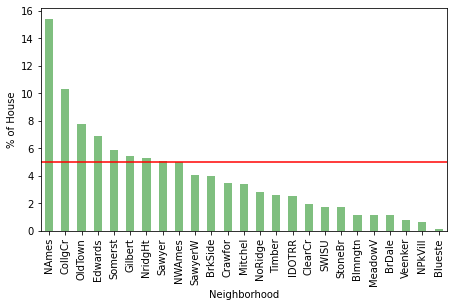

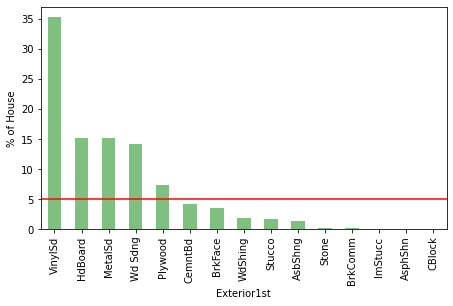

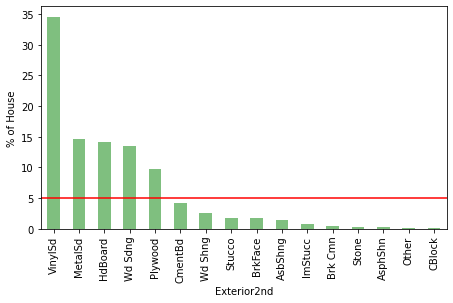

In [10]:
#Visualizing the data
for i,j in enumerate(data.iloc[:,:-1].columns):
  temp = data[j].value_counts()/data[j].shape[0]*100
  plt.figure(figsize=(16,9))
  plt.subplot(2,2,i+1)
  temp.plot(kind='bar', color = 'g',alpha = 0.5);
  plt.axhline(y=5, color = 'r')
  plt.xlabel(j)
  plt.ylabel('% of House')
  plt.show()

# How is SalePrice related to there categories

In [11]:
#Creating function to extract and show % of house and mean value of sale price as per categories
def get_mean_salesprice_per_categories(data,var):
  temp = (data[var].value_counts()/data[var].shape[0]*100).reset_index()
  temp = temp.rename(columns={'index':var, var:'% of House'})
  gr = data.groupby(var)['SalePrice'].mean().reset_index()
  temp2 = temp.merge(gr,on=var)
  return temp2

#Extract and show % of house and mean value of sale price as per categories
get_mean_salesprice_per_categories(data,'Exterior2nd')

,Exterior2nd,% of House,SalePrice
0,VinylSd,34.520548,214432.460317
1,MetalSd,14.657534,149803.172897
2,HdBoard,14.178082,167661.565217
3,Wd Sdng,13.493151,148386.065990
4,Plywood,9.726027,168112.387324
5,CmentBd,4.109589,230093.833333
6,Wd Shng,2.602740,161328.947368
7,Stucco,1.780822,155905.153846
8,BrkFace,1.712329,195818.000000
9,AsbShng,1.369863,114060.550000


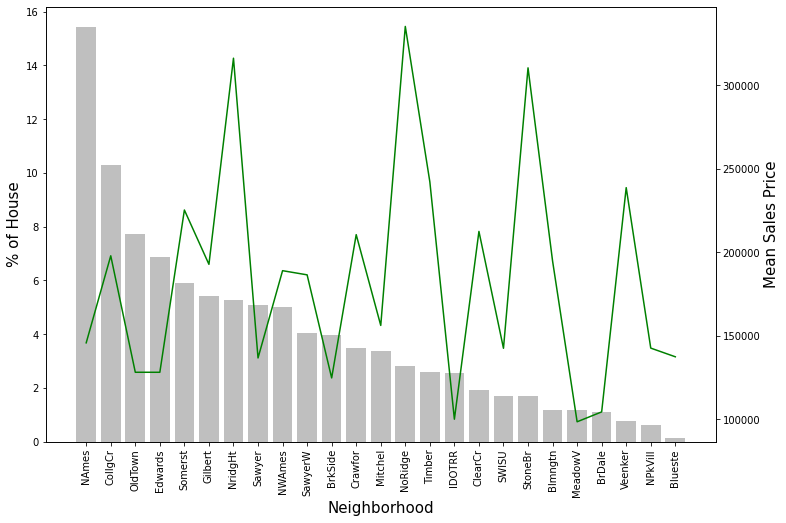

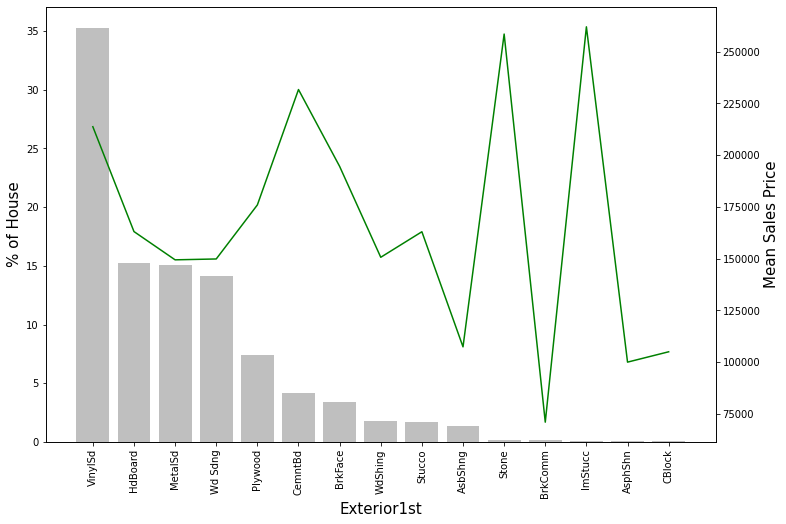

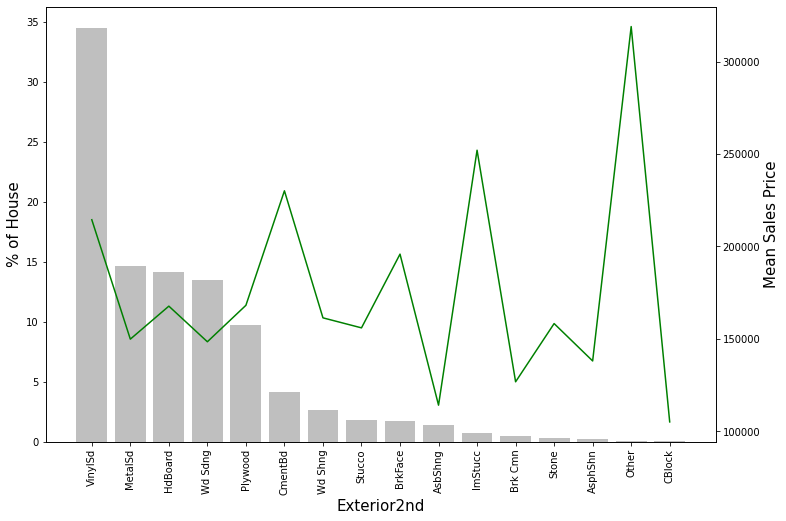

In [12]:
#Creating function which creates plot as per category
def get_plot_per_categories(data,var):
  temp = (data[var].value_counts()/data[var].shape[0]*100).reset_index()
  temp = temp.rename(columns={'index':var, var:'% of House'})
  gr = data.groupby(var)['SalePrice'].mean().reset_index()
  temp2 = temp.merge(gr,on=var)
  fig,ax1 = plt.subplots(figsize = (12,8))
  plt.xticks(data.index, data[var],rotation=90)
  ax2 = ax1.twinx()
  ax1.bar(temp2[var], temp2['% of House'], color = 'grey',alpha = 0.5)
  ax2.plot(temp2[var], temp2['SalePrice'], color = 'green')
  ax1.set_xlabel(var,fontsize=15)
  ax1.set_ylabel('% of House',fontsize=15)
  ax2.set_ylabel('Mean Sales Price',fontsize=15)
  plt.show()

for i in data.iloc[:,:-1].columns:
  get_plot_per_categories(data, i)

#How is SalePrice related to there categories after combining rare variables

In [ ]:
#Identifying rare variables in the data and update the same in the data
data1 = data.copy()
temp1 = (data1['Neighborhood'].value_counts()/data1['Neighborhood'].shape[0]*100).reset_index()
rare1 = set(temp1['index'][temp1['Neighborhood']<=5].values)

temp2 = (data1['Exterior1st'].value_counts()/data1['Exterior1st'].shape[0]*100).reset_index()
rare2 = set(temp2['index'][temp2['Exterior1st']<=5].values)

temp3 = (data1['Exterior2nd'].value_counts()/data1['Exterior2nd'].shape[0]*100).reset_index()
rare3 = set(temp3['index'][temp3['Exterior2nd']<=5].values)

for i in rare1:
  data1['Neighborhood'][data1['Neighborhood']==i]='rare'

for i in rare2:
  data1['Exterior1st'][data1['Exterior1st']==i]='rare'

for i in rare3:
  data1['Exterior2nd'][data1['Exterior2nd']==i]='rare'


In [ ]:
#Extract and show % of house and mean value of sale price as per categories
for i in data1.iloc[:,:-1].columns:
  display(get_mean_salesprice_per_categories(data1, i))

,Neighborhood,% of House,SalePrice
0,rare,38.082192,189261.431655
1,NAmes,15.410959,145847.080000
2,CollgCr,10.273973,197965.773333
3,OldTown,7.739726,128225.300885
4,Edwards,6.849315,128219.700000
5,Somerst,5.890411,225379.837209
6,Gilbert,5.410959,192854.506329
7,NridgHt,5.273973,316270.623377
8,Sawyer,5.068493,136793.135135


,Exterior1st,% of House,SalePrice
0,VinylSd,35.273973,213732.900971
1,HdBoard,15.205479,163077.450450
2,MetalSd,15.068493,149422.177273
3,Wd Sdng,14.109589,149841.645631
4,rare,12.945205,185858.587302
5,Plywood,7.397260,175942.379630


,Exterior2nd,% of House,SalePrice
0,VinylSd,34.520548,214432.460317
1,MetalSd,14.657534,149803.172897
2,HdBoard,14.178082,167661.565217
3,Wd Sdng,13.493151,148386.065990
4,rare,13.424658,184709.943878
5,Plywood,9.726027,168112.387324


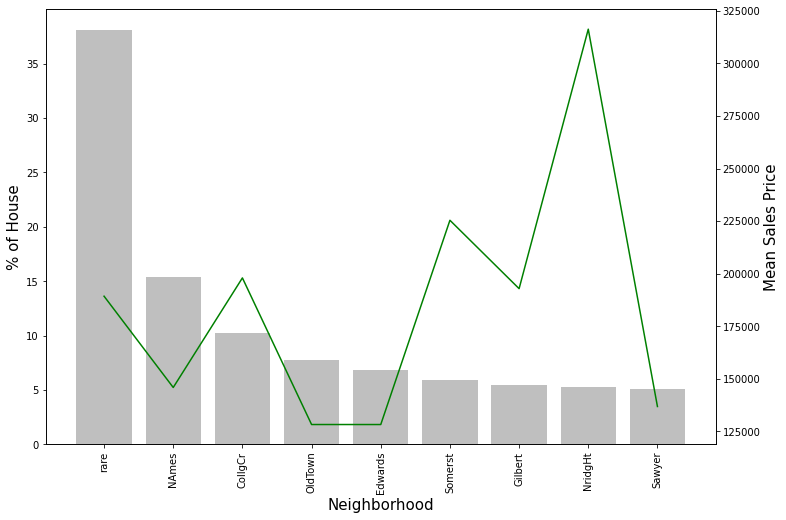

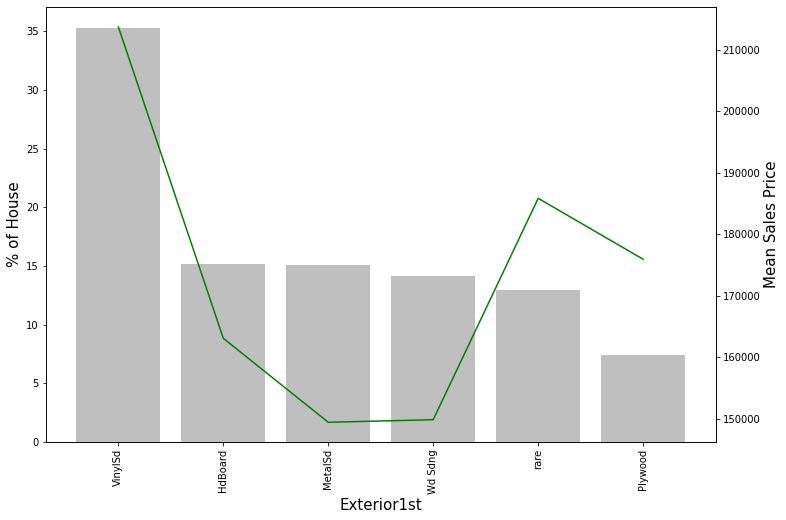

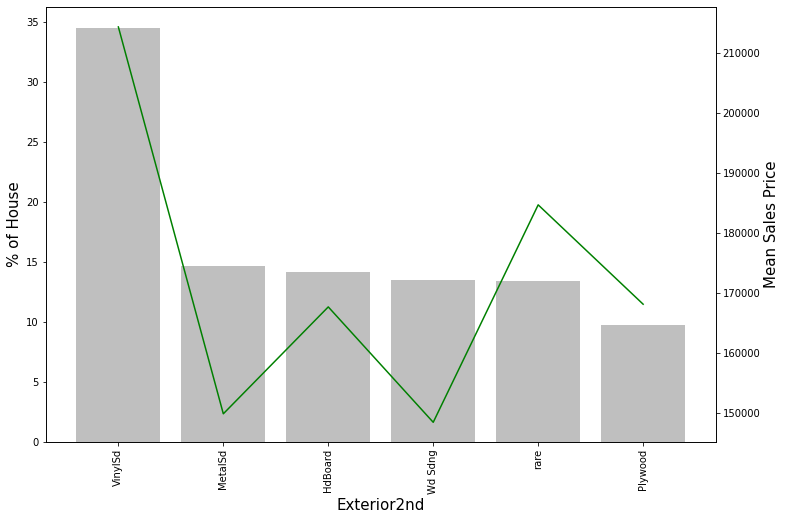

In [ ]:
#creates plot as per category
for i in data1.iloc[:,:-1].columns:
  get_plot_per_categories(data1, i)